# PF002 Global Analysis

This is the analysis that will be used to determine the spread of DTI values in the supratentorial region of the brain. There will be a comparison between the distribution of controls and the patient.

In [1]:
import nibabel as ni
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy
from sklearn.neighbors import KernelDensity
from matplotlib import cm
from matplotlib.colors import LogNorm
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import anderson_ksamp
from scipy.stats import lognorm, probplot
from scipy.optimize import minimize
from sklearn.mixture import GaussianMixture

pre_dir = '/Volumes/Cerberus/MRI/seb_cohort/preclinical_study/PF002/0pre/dti/bias_corr/tbss/stats/ROI/'
post_dir = '/Volumes/Cerberus/MRI/seb_cohort/preclinical_study/PF002/1post/dti/bias_corr/tbss/stats/ROI/'
fu_dir = '/Volumes/Cerberus/MRI/seb_cohort/preclinical_study/PF002/2fu/dti/bias_corr/tbss/stats/ROI/'

<b>Go to:</b>
- [Pre-surgery analysis](#section-pre)
- [Post-surgery analysis](#section-post)
- [Follow-up analysis](#section-fu)

## Histogram: Supratentorial region (Pre-surgery)

Patient histogram and all control data to create a patient FA population and total control population.

<a id="section-pre"></a>

### Code: Creating the dataframe for patient and control population

In [2]:
# Images from patients

supra_pre = pre_dir+'global_supratentorial/vol0020_supra.nii.gz'
supra_post = post_dir+'global_supratentorial/vol0020_supra.nii.gz'
supra_fu = fu_dir+'global_supratentorial/vol0020_supra.nii.gz'

#Images from controls (all controls are the same, so just use 0pre controls)

supra_00 = pre_dir+'global_supratentorial/vol0000_supra.nii.gz'
supra_01 = pre_dir+'global_supratentorial/vol0001_supra.nii.gz'
supra_02 = pre_dir+'global_supratentorial/vol0002_supra.nii.gz'
supra_03 = pre_dir+'global_supratentorial/vol0003_supra.nii.gz'
supra_04 = pre_dir+'global_supratentorial/vol0004_supra.nii.gz'
supra_05 = pre_dir+'global_supratentorial/vol0005_supra.nii.gz'
supra_06 = pre_dir+'global_supratentorial/vol0006_supra.nii.gz'
supra_07 = pre_dir+'global_supratentorial/vol0007_supra.nii.gz'
supra_08 = pre_dir+'global_supratentorial/vol0008_supra.nii.gz'
supra_09 = pre_dir+'global_supratentorial/vol0009_supra.nii.gz'
supra_10 = pre_dir+'global_supratentorial/vol0010_supra.nii.gz'
supra_11 = pre_dir+'global_supratentorial/vol0011_supra.nii.gz'
supra_12 = pre_dir+'global_supratentorial/vol0012_supra.nii.gz'
supra_13 = pre_dir+'global_supratentorial/vol0013_supra.nii.gz'
supra_14 = pre_dir+'global_supratentorial/vol0014_supra.nii.gz'
supra_15 = pre_dir+'global_supratentorial/vol0015_supra.nii.gz'
supra_16 = pre_dir+'global_supratentorial/vol0016_supra.nii.gz'
supra_17 = pre_dir+'global_supratentorial/vol0017_supra.nii.gz'
supra_18 = pre_dir+'global_supratentorial/vol0018_supra.nii.gz'
supra_19 = pre_dir+'global_supratentorial/vol0019_supra.nii.gz'

In [3]:
images = [supra_pre, supra_post, supra_fu, supra_00, supra_01, supra_02, supra_03, 
          supra_04, supra_05, supra_06, supra_07, supra_08, supra_09, supra_10, supra_11, 
          supra_12, supra_13, supra_14, supra_15, supra_16, supra_17, supra_18, supra_19]

matrix = {'mat_pre':[], 'mat_post':[], 'mat_fu':[], 'mat_00':[], 'mat_01':[], 'mat_02':[], 'mat_03':[], 'mat_04':[], 'mat_05':[],
         'mat_06':[], 'mat_07':[], 'mat_08':[], 'mat_09':[], 'mat_10':[], 'mat_11':[], 'mat_12':[], 'mat_13':[], 'mat_14':[],
         'mat_15':[], 'mat_16':[], 'mat_17':[], 'mat_18':[], 'mat_19':[]}

volumes = {'mat_pre':91.37, 'mat_post':85.45, 'mat_fu':39.97, 'mat_00':13.40, 'mat_01':5.96, 'mat_02':3.78, 'mat_03':4.07, 'mat_04':6.67, 'mat_05':8.56,
         'mat_06':7.40, 'mat_07':25.83, 'mat_08':3.91, 'mat_09':10.35, 'mat_10':4.10, 'mat_11':3.40, 'mat_12':9.95, 'mat_13':6.09, 'mat_14':4.46,
         'mat_15':6.37, 'mat_16':25.63, 'mat_17':5.14, 'mat_18':18.02, 'mat_19':6.99}


matrix_names = list(matrix.keys())
volumes_value = list(volumes.values())

label_matrix = ['mat_pre', 'mat_post', 'mat_fu', 'mat_00', 'mat_01', 'mat_02', 'mat_03', 'mat_04', 'mat_05', 'mat_06',
               'mat_07', 'mat_08', 'mat_09', 'mat_10', 'mat_11', 'mat_12', 'mat_13', 'mat_14', 'mat_15', 'mat_16', 
               'mat_17', 'mat_18', 'mat_19']

#volume_expand = {}

for x in range(0,len(images)):
    
    print(label_matrix[x])
            
    img = ni.load(images[x])
    data = img.get_fdata()
    
    intensity=[]
    volume_list = []
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                if data[i][j][k] != 0.0:
                    intensity.append(data[i][j][k])
                    #volume_list.append(volumes[label_matrix[x]])
    
    matrix[label_matrix[x]]=intensity
    #volume_expand[label_matrix[x]]=volume_list
    
DTI_value = list(matrix.values())
#volume_value_expand = list(volume_expand.values())

mat_pre
mat_post
mat_fu
mat_00
mat_01
mat_02
mat_03
mat_04
mat_05
mat_06
mat_07
mat_08
mat_09
mat_10
mat_11
mat_12
mat_13
mat_14
mat_15
mat_16
mat_17
mat_18
mat_19


### Code: Plot histogram

476532
9530640


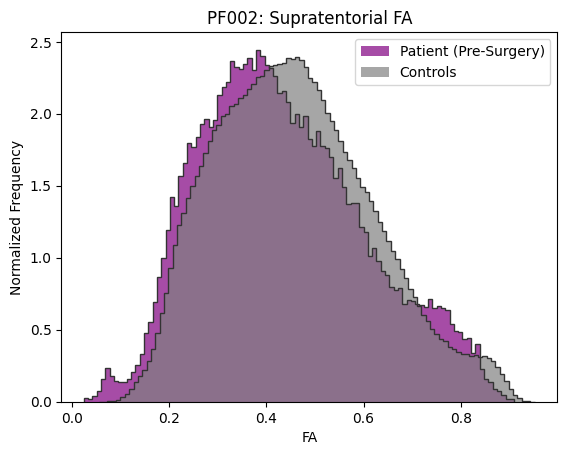

In [4]:
# Box plot 

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def make_histogram():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 0:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    # Create histogram for the subset population
    plt.hist(patient_df['FA'], bins=100, color='0.2', histtype='step', density=True)
    plt.hist(patient_df['FA'], bins=100, color='purple', density=True, alpha=0.7, label='Patient (Pre-Surgery)')
    plt.hist(control_df['FA'], bins=100, color='0.2', histtype='step', density=True)
    plt.hist(control_df['FA'], bins=100, color='0.5',density=True, alpha=0.7, label='Controls')
    
    # Customize labels and title
    plt.xlabel('FA')
    #plt.xscale('log')
    plt.ylabel('Normalized Frequency')
    plt.title('PF002: Supratentorial FA')

    # Add legend
    plt.legend()
    
make_histogram()    
    


### Code: Fit and plot lognormal

476532
9530640
0.18945449113827334
-0.3864865988434279
0.8294043174897137
0.055430032312870026
0.9517990946769714


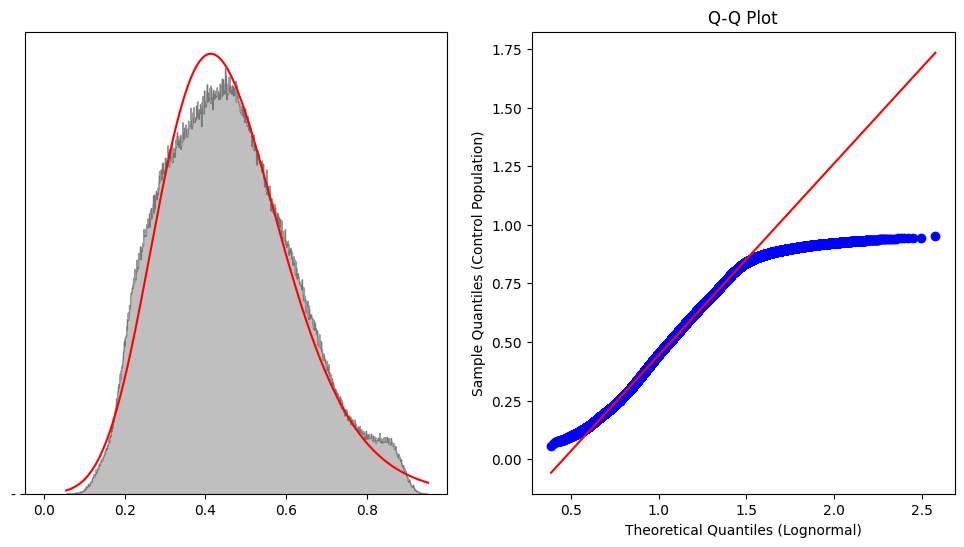

In [8]:
patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def lognorm_fit():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 0:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    patient_population = patient_df['FA'].values
    control_population = control_df['FA'].values
    
#     patient_params = lognorm.fit(patient_population)
    params = lognorm.fit(control_population)
    
#     shape_patient, loc_patient, scale_patient = patient_params
    shape, loc, scale = params
    
    print(shape)
    print(loc)
    print(scale)
    
    x = np.linspace(min(control_population), max(control_population), len(control_population))
    print(min(control_population))
    print(max(control_population))
    
    pdf = lognorm.pdf(x, shape, loc, scale)
    
    num_quantiles = 1000
    
    quantiles_control = np.percentile(control_population, np.linspace(0, 100, 1000))
    theoretical_quantiles = lognorm.ppf(np.linspace(0, 100, 1000), shape, loc, scale)
    
    #theoretical_quantiles = lognorm.ppf(np.linspace(0.001, 0.999, len(data)), shape, loc, scale)
    
    #sorted_data = np.sort(control_population)
    #empirical_quantiles=np.percentile(sorted_data, np.linspace(0.1, 99.9, 10000))
    
    # Calculate density values
    #density = lognorm.pdf(empirical_quantiles, shape, loc, scale)
   
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].hist(control_df['FA'], bins=1000, color='0.2', histtype='step', alpha=0.5, density=True)
    axes[0].hist(control_df['FA'], bins=1000, color='0.5',density=True, alpha=0.5, label='Controls')   
    axes[0].plot(x, pdf, 'r', '-')
    
    
    probplot(control_population, dist=lognorm, sparams=(shape,), plot=axes[1])
    #axes[1].scatter(quantiles_lognorm, quantiles_control)
    axes[1].set_xlabel('Theoretical Quantiles (Lognormal)')
    axes[1].set_ylabel('Sample Quantiles (Control Population)')
    axes[1].set_title('Q-Q Plot')
    #axes[1].plot([np.min(quantiles_lognorm), np.max(quantiles_lognorm)], [np.min(quantiles_lognorm), np.max(quantiles_lognorm)], color='red', linestyle='--')

    # Add markers to the QQ plot using scatter
#     quantiles, values = probplot(control_population, dist='lognorm', sparams=(shape, loc, scale), fit=False)
#     for q, v in zip(quantiles, values):
#         axes[1].plot(q, v, marker='.', color='black', markersize=10)
    
    #axes[1].set_xlim([0, 1])
    #axes[1].set_ylim([0, 1])

    #axes[1].set_xlabel('Theoretical Quantiles')
    #axes[1].set_ylabel('Empirical Quantiles')
    #axes[1].set_title('Quantile-Quantile (q-q) Plot')
    #axes[1].legend()

    # Add color bar to the scatter plot
    #cbar = plt.colorbar(scatter)
    #cbar.set_label('Density', rotation=270, labelpad=15)

    
lognorm_fit()

476532
9530640
[[0.43971536]
 [0.78866978]]
[[[0.14291261]]

 [[0.06556606]]]
[0.94794663 0.05205337]


<IPython.core.display.Javascript object>


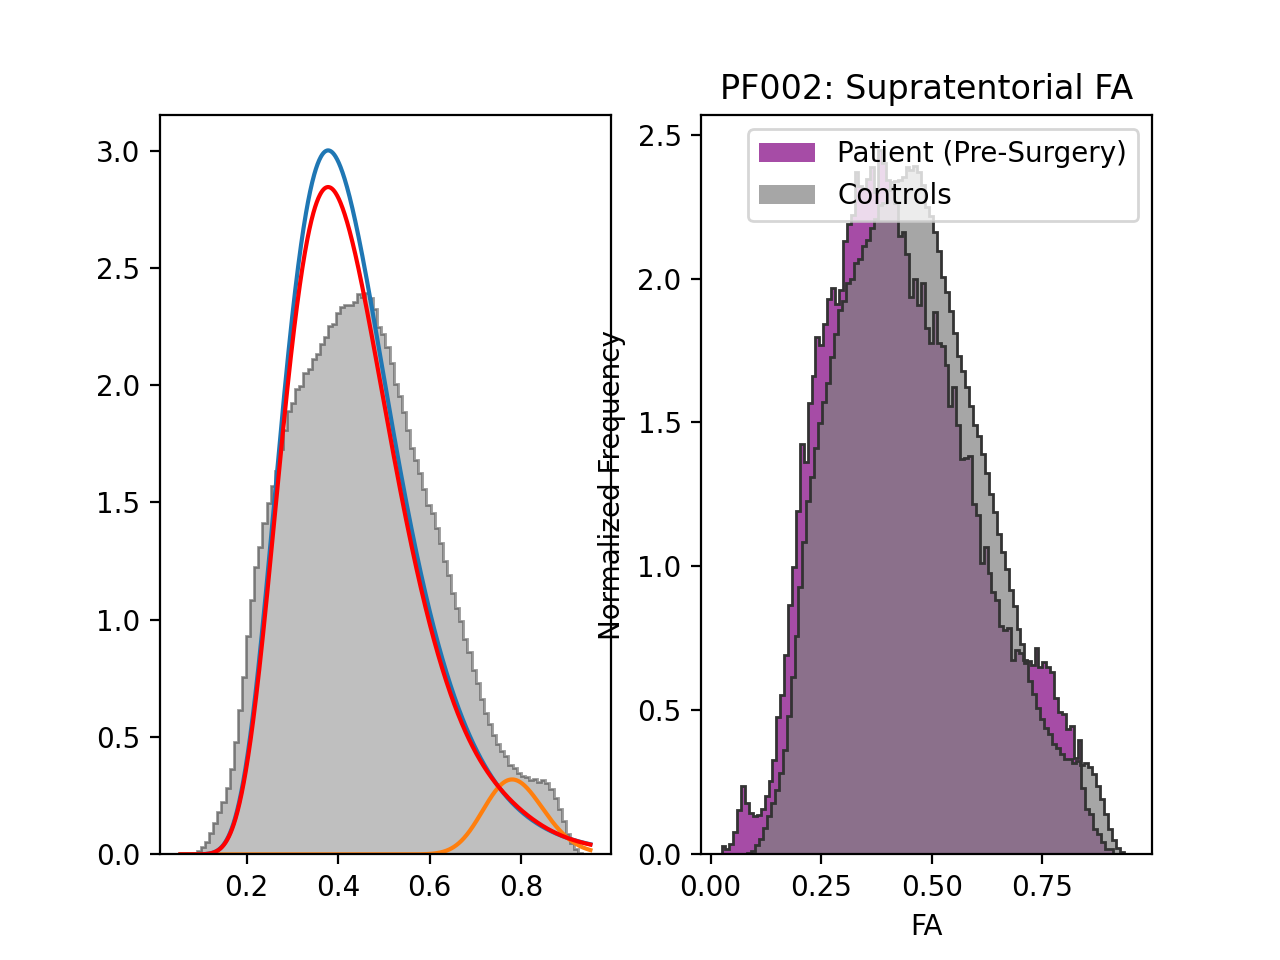

In [38]:
patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def double_lognorm():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 0:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    patient_population = patient_df['FA'].values
    control_population = control_df['FA'].values
    
    control_population = control_population.reshape(-1, 1)
    
    num_components = 2
    
    initial_means = np.array([[0.5],[1]])
    
    gmm = GaussianMixture(n_components=num_components, random_state=0, means_init=initial_means)
    gmm.fit(control_population)
    
    means = gmm.means_
    stds = np.sqrt(gmm.covariances_)
    
    print(means)
    print(stds)

    weights = gmm.weights_

    print(weights)
    
    fig, axes = plt.subplots(1, 2)
    
    axes[0].hist(control_df['FA'], bins=100, color='0.2', histtype='step', alpha=0.5, density=True)
    axes[0].hist(control_df['FA'], bins=100, color='0.5',density=True, alpha=0.5, label='Controls')   
    
    x_range = np.linspace(min(control_population), max(control_population), 1000)
    combined_distribution = np.zeros_like(x_range)
    
    for i in range(num_components):
        log_mu = np.log(means[i]) - 0.5 * np.log(1 + (stds[i]**2) / (means[i]**2))
        log_sigma = np.sqrt(np.log(1 + (stds[i]**2) / (means[i]**2)))
        log_normal_dist = weights[i] * np.exp(-(np.log(x_range) - log_mu)**2 / (2 * log_sigma**2)) / (x_range * log_sigma * np.sqrt(2 * np.pi))
        axes[0].plot(x_range, log_normal_dist, label=f'Lognormal {i+1}')
        combined_distribution += weights[i] * log_normal_dist
    
    axes[0].plot(x_range, combined_distribution, color='red')
        
double_lognorm()

In [17]:
# Anderson-Darling Test - Testing...

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def ad_test():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 0:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    patient_population = patient_df['FA'].values
    control_population = control_df['FA'].values
    
    statistic, critical_values, significance_level = anderson_ksamp([patient_population, control_population])
    
    print("Anderson-Darling Statistic:", statistic)
    print("Critical Values:", critical_values)
    print("Significance Level:", significance_level)
    
ad_test()

476532
9530640
Anderson-Darling Statistic: 2097.6649619665636
Critical Values: [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
Significance Level: 0.001


/var/folders/t6/wszlvclj3y13vc4g1w685y0m0000gp/T/ipykernel_47821/3088637529.py:36: UserWarning: p-value floored: true value smaller than 0.001
  statistic, critical_values, significance_level = anderson_ksamp([patient_population, control_population])


476532
9530640
KS Statistic: 0.07405043103086467
P-value: 0.0


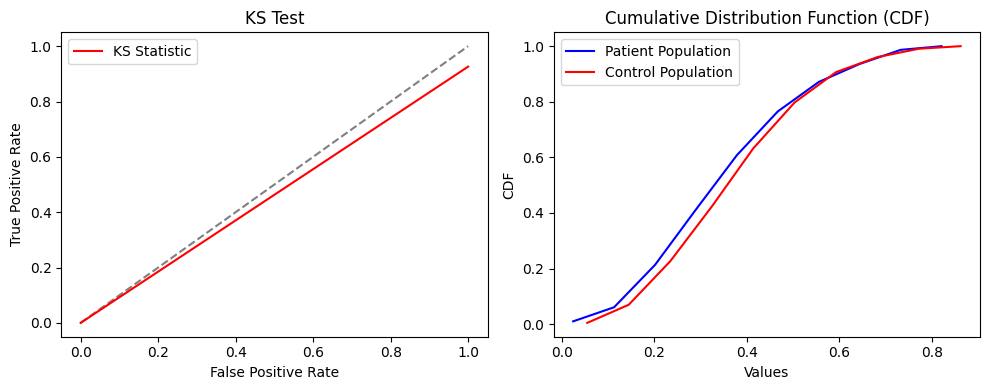

In [5]:
# KS Test

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def ks_test_plot():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 0:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    patient_population = patient_df['FA'].values
    control_population = control_df['FA'].values
    
    # Normalize populations
    #normalized_population_patient = (patient_population - np.mean(patient_population)) / np.std(patient_population)
    #normalized_population_control = (control_population - np.mean(control_population)) / np.std(control_population)

    
    # Perform KS test
    ks_statistic, p_value = stats.ks_2samp(patient_population, control_population)

    values_1, base_1 = np.histogram(patient_population, bins=10)
    cumulative_frequencies_1 = np.cumsum(values_1)

    values_2, base_2 = np.histogram(control_population, bins=10)
    cumulative_frequencies_2 = np.cumsum(values_2)

    # Normalize cumulative frequencies to obtain CDF for each population
    cdf_1 = cumulative_frequencies_1 / float(np.sum(values_1))
    cdf_2 = cumulative_frequencies_2 / float(np.sum(values_2))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot the KS test results
    ax1.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
    ax1.plot([0, 1], [0, 1 - ks_statistic], color='red', label='KS Statistic')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('KS Test')

    # Plot the CDFs for both populations
    ax2.plot(base_1[:-1], cdf_1, color='blue', label='Patient Population')
    ax2.plot(base_2[:-1], cdf_2, color='red', label='Control Population')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('CDF')
    ax2.set_title('Cumulative Distribution Function (CDF)')

    # Add legends
    ax1.legend()
    ax2.legend()

    # Adjust spacing between subplots
    plt.tight_layout()
    
    print(f"KS Statistic: {float(ks_statistic)}")
    print(f"P-value: {float(p_value)}")
    
ks_test_plot()
    



### Code: T-test

In [6]:
# T Test 

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def t_test():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 0:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    patient_population = patient_df['FA'].values
    control_population = control_df['FA'].values
    

    # Perform two-sample t-test
    t_statistic, p_value = stats.ttest_ind(patient_population, control_population)

    # Display the test results
    print(f"T-Statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    
    
t_test()



476532
9530640
T-Statistic: -48.20216643145228
P-value: 0.0


## Histogram: Supratentorial region (Post-surgery)

Patient histogram and all control data to create a patient FA population and total control population.

<a id="section-post"></a>

### Code: Plot histogram

474984
9530640


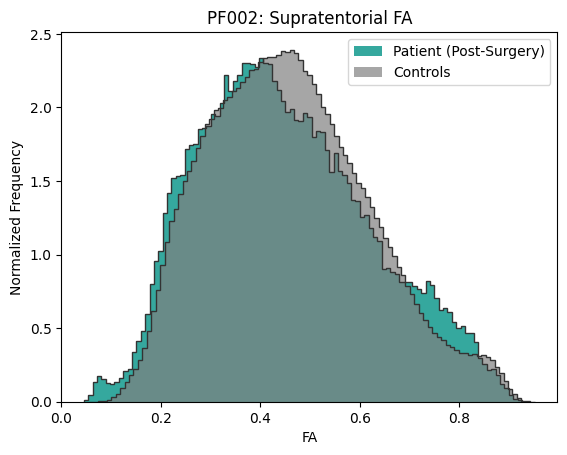

In [5]:
# Box plot 

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def make_histogram():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 1:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    # Create histogram for the subset population
    plt.hist(patient_df['FA'], bins=100, color='0.2', histtype='step', density=True)
    plt.hist(patient_df['FA'], bins=100, color='#029386', density=True, alpha=0.8, label='Patient (Post-Surgery)')
    plt.hist(control_df['FA'], bins=100, color='0.2', histtype='step', density=True)
    plt.hist(control_df['FA'], bins=100, color='0.5',density=True, alpha=0.7, label='Controls')
    
    # Customize labels and title
    plt.xlabel('FA')
    plt.ylabel('Normalized Frequency')
    plt.title('PF002: Supratentorial FA')

    # Add legend
    plt.legend()
    
make_histogram()    
    

### Code: KS Tests

474984
9530640
KS Statistic: 0.03925912250240721
P-value: 6.527852799805434e-152


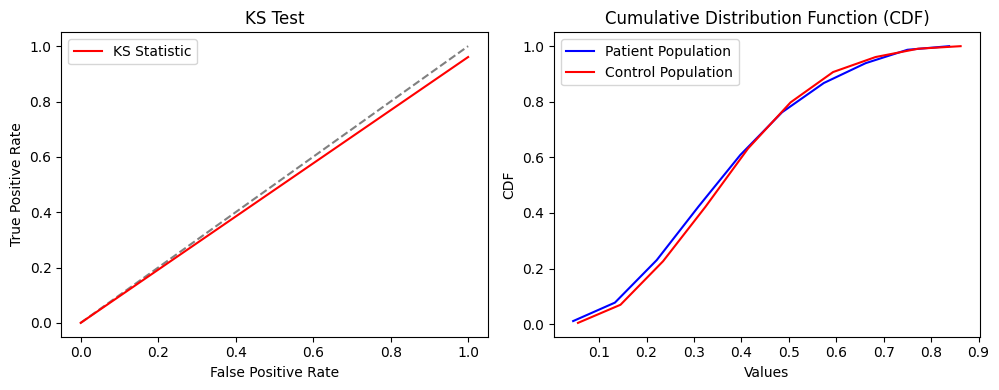

In [15]:
# KS Test Plot

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def ks_test_plot():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 1:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    patient_population = patient_df['FA'].values
    control_population = control_df['FA'].values
    
    # Normalize populations
    #normalized_population_patient = (patient_population - np.mean(patient_population)) / np.std(patient_population)
    #normalized_population_control = (control_population - np.mean(control_population)) / np.std(control_population)

    
    # Perform KS test
    ks_statistic, p_value = stats.ks_2samp(patient_population, control_population)

    values_1, base_1 = np.histogram(patient_population, bins=10)
    cumulative_frequencies_1 = np.cumsum(values_1)

    values_2, base_2 = np.histogram(control_population, bins=10)
    cumulative_frequencies_2 = np.cumsum(values_2)

    # Normalize cumulative frequencies to obtain CDF for each population
    cdf_1 = cumulative_frequencies_1 / float(np.sum(values_1))
    cdf_2 = cumulative_frequencies_2 / float(np.sum(values_2))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot the KS test results
    ax1.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
    ax1.plot([0, 1], [0, 1 - ks_statistic], color='red', label='KS Statistic')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('KS Test')

    # Plot the CDFs for both populations
    ax2.plot(base_1[:-1], cdf_1, color='blue', label='Patient Population')
    ax2.plot(base_2[:-1], cdf_2, color='red', label='Control Population')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('CDF')
    ax2.set_title('Cumulative Distribution Function (CDF)')

    # Add legends
    ax1.legend()
    ax2.legend()

    # Adjust spacing between subplots
    plt.tight_layout()
    
    print(f"KS Statistic: {float(ks_statistic)}")
    print(f"P-value: {float(p_value)}")
    
ks_test_plot()
    



### Code: T-test

In [16]:
# T Test 

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def t_test():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 1:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    patient_population = patient_df['FA'].values
    control_population = control_df['FA'].values
    

    # Perform two-sample t-test
    t_statistic, p_value = stats.ttest_ind(patient_population, control_population)

    # Display the test results
    print(f"T-Statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    
    
t_test()



474984
9530640
T-Statistic: -16.74787845686286
P-value: 5.914849652076169e-63


## Histogram: Supratentorial region (Follow-up)

Patient histogram and all control data to create a patient FA population and total control population.

<a id="section-fu"></a>

### Code: Plot histogram

475452
9530640


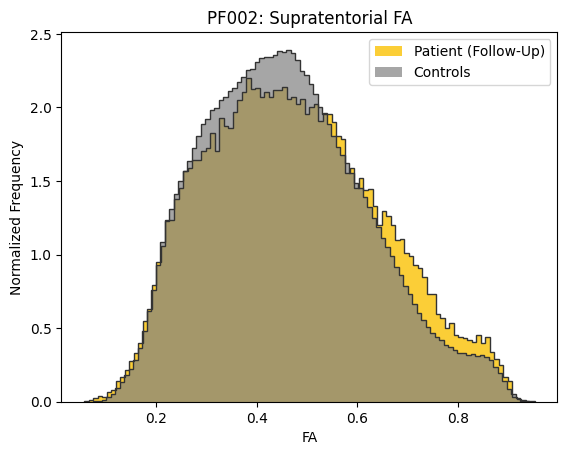

In [7]:
# Box plot 

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def make_histogram():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 2:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    # Create histogram for the subset population
    plt.hist(patient_df['FA'], bins=100, color='0.2', histtype='step', density=True)
    plt.hist(patient_df['FA'], bins=100, color='#FAC205', density=True, alpha=0.8, label='Patient (Follow-Up)')
    plt.hist(control_df['FA'], bins=100, color='0.2', histtype='step', density=True)
    plt.hist(control_df['FA'], bins=100, color='0.5',density=True, alpha=0.7, label='Controls')
    
    # Customize labels and title
    plt.xlabel('FA')
    plt.ylabel('Normalized Frequency')
    plt.title('PF002: Supratentorial FA')

    # Add legend
    plt.legend()
    
make_histogram()    
    

### Code: KS Tests

475452
9530640
KS Statistic: 0.049050039948435376
P-value: 3.7178151283319206e-237


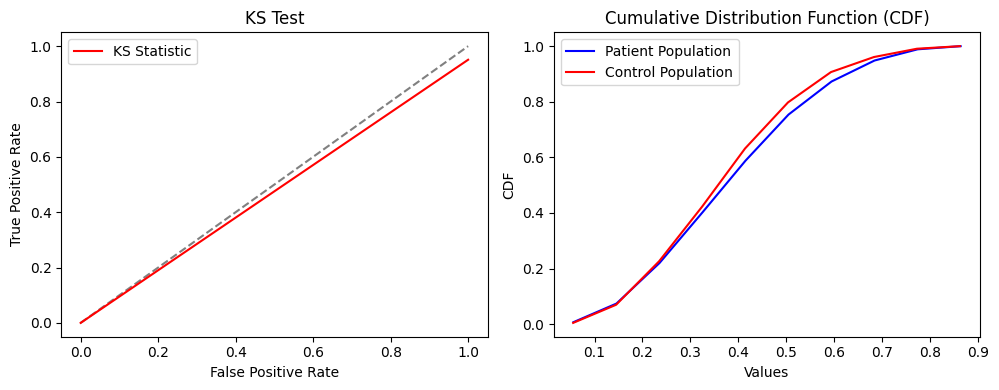

In [18]:
# KS Test Plot

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def ks_test_plot():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 2:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    patient_population = patient_df['FA'].values
    control_population = control_df['FA'].values
    
    # Normalize populations
    #normalized_population_patient = (patient_population - np.mean(patient_population)) / np.std(patient_population)
    #normalized_population_control = (control_population - np.mean(control_population)) / np.std(control_population)

    
    # Perform KS test
    ks_statistic, p_value = stats.ks_2samp(patient_population, control_population)

    values_1, base_1 = np.histogram(patient_population, bins=10)
    cumulative_frequencies_1 = np.cumsum(values_1)

    values_2, base_2 = np.histogram(control_population, bins=10)
    cumulative_frequencies_2 = np.cumsum(values_2)

    # Normalize cumulative frequencies to obtain CDF for each population
    cdf_1 = cumulative_frequencies_1 / float(np.sum(values_1))
    cdf_2 = cumulative_frequencies_2 / float(np.sum(values_2))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot the KS test results
    ax1.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
    ax1.plot([0, 1], [0, 1 - ks_statistic], color='red', label='KS Statistic')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('KS Test')

    # Plot the CDFs for both populations
    ax2.plot(base_1[:-1], cdf_1, color='blue', label='Patient Population')
    ax2.plot(base_2[:-1], cdf_2, color='red', label='Control Population')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('CDF')
    ax2.set_title('Cumulative Distribution Function (CDF)')

    # Add legends
    ax1.legend()
    ax2.legend()

    # Adjust spacing between subplots
    plt.tight_layout()
    
    print(f"KS Statistic: {float(ks_statistic)}")
    print(f"P-value: {float(p_value)}")
    
ks_test_plot()
    

### Code: T-test

In [19]:
# T Test 

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def t_test():
    
    frame_patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 2:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_df = pd.DataFrame(frame_patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
        
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_df.size)
    print(control_df.size)
    
    patient_population = patient_df['FA'].values
    control_population = control_df['FA'].values
    

    # Perform two-sample t-test
    t_statistic, p_value = stats.ttest_ind(patient_population, control_population)

    # Display the test results
    print(f"T-Statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    
    
t_test()


475452
9530640
T-Statistic: 31.280927742905448
P-value: 9.33352978559035e-215


## Histogram: Supratentorial region (All scans)

476532
474984
475452
9530640


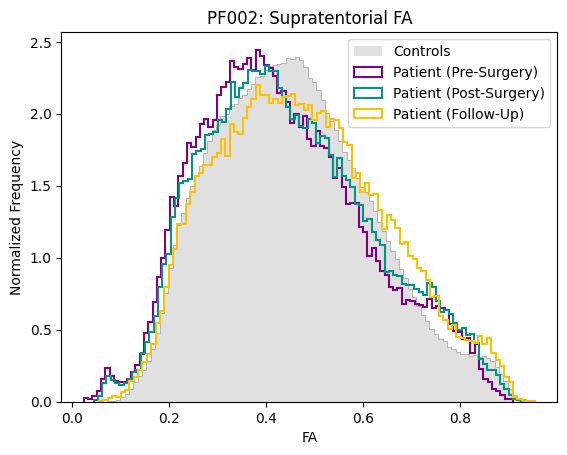

In [8]:
# Box plot 

patient_set = [0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
patient_colours = ['purple','#029386','#FAC205','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey',
                  'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

def make_histogram():
    
    frame_0patient = []
    frame_1patient = []
    frame_2patient = []
    frame_control = []
        
    for index, image in enumerate(DTI_value):
        is_patient = patient_set[index]
        colours = patient_colours[index]
        if patient_set[index] == 0 or patient_set[index] == 1 or patient_set[index] == 2:
            if patient_set[index] == 0:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_0patient.append(inner)
            if patient_set[index] == 1:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_1patient.append(inner)
            if patient_set[index] == 2:
                for v in image:
                    inner = [v, volumes_value[index], is_patient, colours]
                    frame_2patient.append(inner)
        else:
            for v in image:
                inner = [v, volumes_value[index], is_patient, colours]
                frame_control.append(inner)
            
    
    patient_0df = pd.DataFrame(frame_0patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    patient_1df = pd.DataFrame(frame_1patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    patient_2df = pd.DataFrame(frame_2patient, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    control_df = pd.DataFrame(frame_control, columns=['FA', 'Ventricle Volume', 'Patient', 'Colours'])
    
    print(patient_0df.size)
    print(patient_1df.size)
    print(patient_2df.size)
    print(control_df.size)
    
    # Create histogram for the subset population
    plt.hist(control_df['FA'], bins=100, color='0.7', histtype='step', density=True, linewidth=0.7)
    plt.hist(control_df['FA'], bins=100, color='0.8',density=True, alpha=0.6, label='Controls')
    plt.hist(patient_0df['FA'], bins=100, color='purple', histtype='step', density=True, linewidth=1.5, label='Patient (Pre-Surgery)')
    #plt.hist(patient_0df['FA'], bins=100, color='purple', density=True, alpha=0, linewidth=5, label='Patient (Pre-Surgery)')
    plt.hist(patient_1df['FA'], bins=100, color='#029386', histtype='step', density=True, linewidth=1.5, label='Patient (Post-Surgery)')
    #plt.hist(patient_1df['FA'], bins=100, color='#029386', density=True, alpha=0, label='Patient (Post-Surgery)')
    plt.hist(patient_2df['FA'], bins=100, color='#FAC205', histtype='step', density=True, linewidth=1.5, label='Patient (Follow-Up)')
    #plt.hist(patient_2df['FA'], bins=100, color='#FAC205', density=True, alpha=0, label='Patient (Follow-Up)')
    
    
    # Customize labels and title
    plt.xlabel('FA')
    plt.ylabel('Normalized Frequency')
    plt.title('PF002: Supratentorial FA')

    # Add legend
    plt.legend()
    
make_histogram()    
    